In [11]:
options(warn = -1)
suppressPackageStartupMessages(library(tidyverse)) # metapackage with lots of helpful functions
suppressPackageStartupMessages(library(tidyquant))

# Retrieve stock data of the GAFA (Google Amazon Facebook Apple)
if you are running this kernel from Kaggle make sure you enable Internet connection in the settings.

In [28]:
start <- "2004-01-01"
end <- "2019-05-30"
GOOG <- tq_get("GOOG", get = "stock.prices", from = start, to = end)
AAPL <- tq_get("AAPL", get = "stock.prices", from = start, to = end)
FB <- tq_get("FB", get = "stock.prices", from = start, to = end)
AMZN <- tq_get("AMZN", get = "stock.prices", from = start, to = end)

The stock prics for these companies are now in our current environment.

In [13]:
map(list(GOOG, AAPL, FB, AMZN), class)

[[1]]
[1] "tbl_df"     "tbl"        "data.frame"

[[2]]
[1] "tbl_df"     "tbl"        "data.frame"

[[3]]
[1] "tbl_df"     "tbl"        "data.frame"

[[4]]
[1] "tbl_df"     "tbl"        "data.frame"

What is really nice about the tidyquant package is that it returns a tibble we can easily work with.

In [14]:
head(GOOG)

date,open,high,low,close,volume,adjusted
2004-08-19,49.67690,51.69378,47.66995,49.84580,44994500,49.84580
2004-08-20,50.17863,54.18756,49.92529,53.80505,23005800,53.80505
2004-08-23,55.01717,56.37334,54.17266,54.34653,18393200,54.34653
2004-08-24,55.26058,55.43942,51.45036,52.09616,15361800,52.09616
2004-08-25,52.14087,53.65105,51.60436,52.65751,9257400,52.65751
2004-08-26,52.13591,53.62621,51.99184,53.60634,7148200,53.60634


The columns mean :
- Open : The opening price is the price at which a security first trades upon the opening of an exchange on a trading day
- High : The highest stock price that day
- Low: The stock prince that day
- Close : The closing stock price that day
- Volume: the total of transactions that day
- Adjusted : Adjusted closing price amends a stock's closing price to accurately reflect that stock's value after accounting for any corporate actions. It is considered to be the true price of that stock and is often used when examining historical returns or performing a detailed analysis of historical returns. [Thanks to investopedia](https://www.investopedia.com/terms/a/adjusted_closing_price.asp)

Since I am going to plot the stock prices of these companies, I am going to combine all the dataset into a single dataframe.

In [29]:
GOOG <- GOOG %>% mutate(symbol = "GOOG")
AAPL <- AAPL %>% mutate(symbol = "AAPL")
FB <- FB %>% mutate(symbol = "FB")
AMZN <- AMZN %>% mutate(symbol = "AMZN")

# bind them

stocks <- bind_rows(GOOG, AAPL, FB, AMZN)

In [17]:
glimpse(stocks)

Observations: 13,082
Variables: 8
$ date     <date> 2004-08-19, 2004-08-20, 2004-08-23, 2004-08-24, 2004-08-2...
$ open     <dbl> 49.67690, 50.17863, 55.01717, 55.26058, 52.14087, 52.13591...
$ high     <dbl> 51.69378, 54.18756, 56.37334, 55.43942, 53.65105, 53.62621...
$ low      <dbl> 47.66995, 49.92529, 54.17266, 51.45036, 51.60436, 51.99184...
$ close    <dbl> 49.84580, 53.80505, 54.34653, 52.09616, 52.65751, 53.60634...
$ volume   <dbl> 44994500, 23005800, 18393200, 15361800, 9257400, 7148200, ...
$ adjusted <dbl> 49.84580, 53.80505, 54.34653, 52.09616, 52.65751, 53.60634...
$ symbol   <chr> "GOOG", "GOOG", "GOOG", "GOOG", "GOOG", "GOOG", "GOOG", "G...


# Visualisations

In [32]:
options(repr.plot.res = 300)
theme_set(theme_tq())

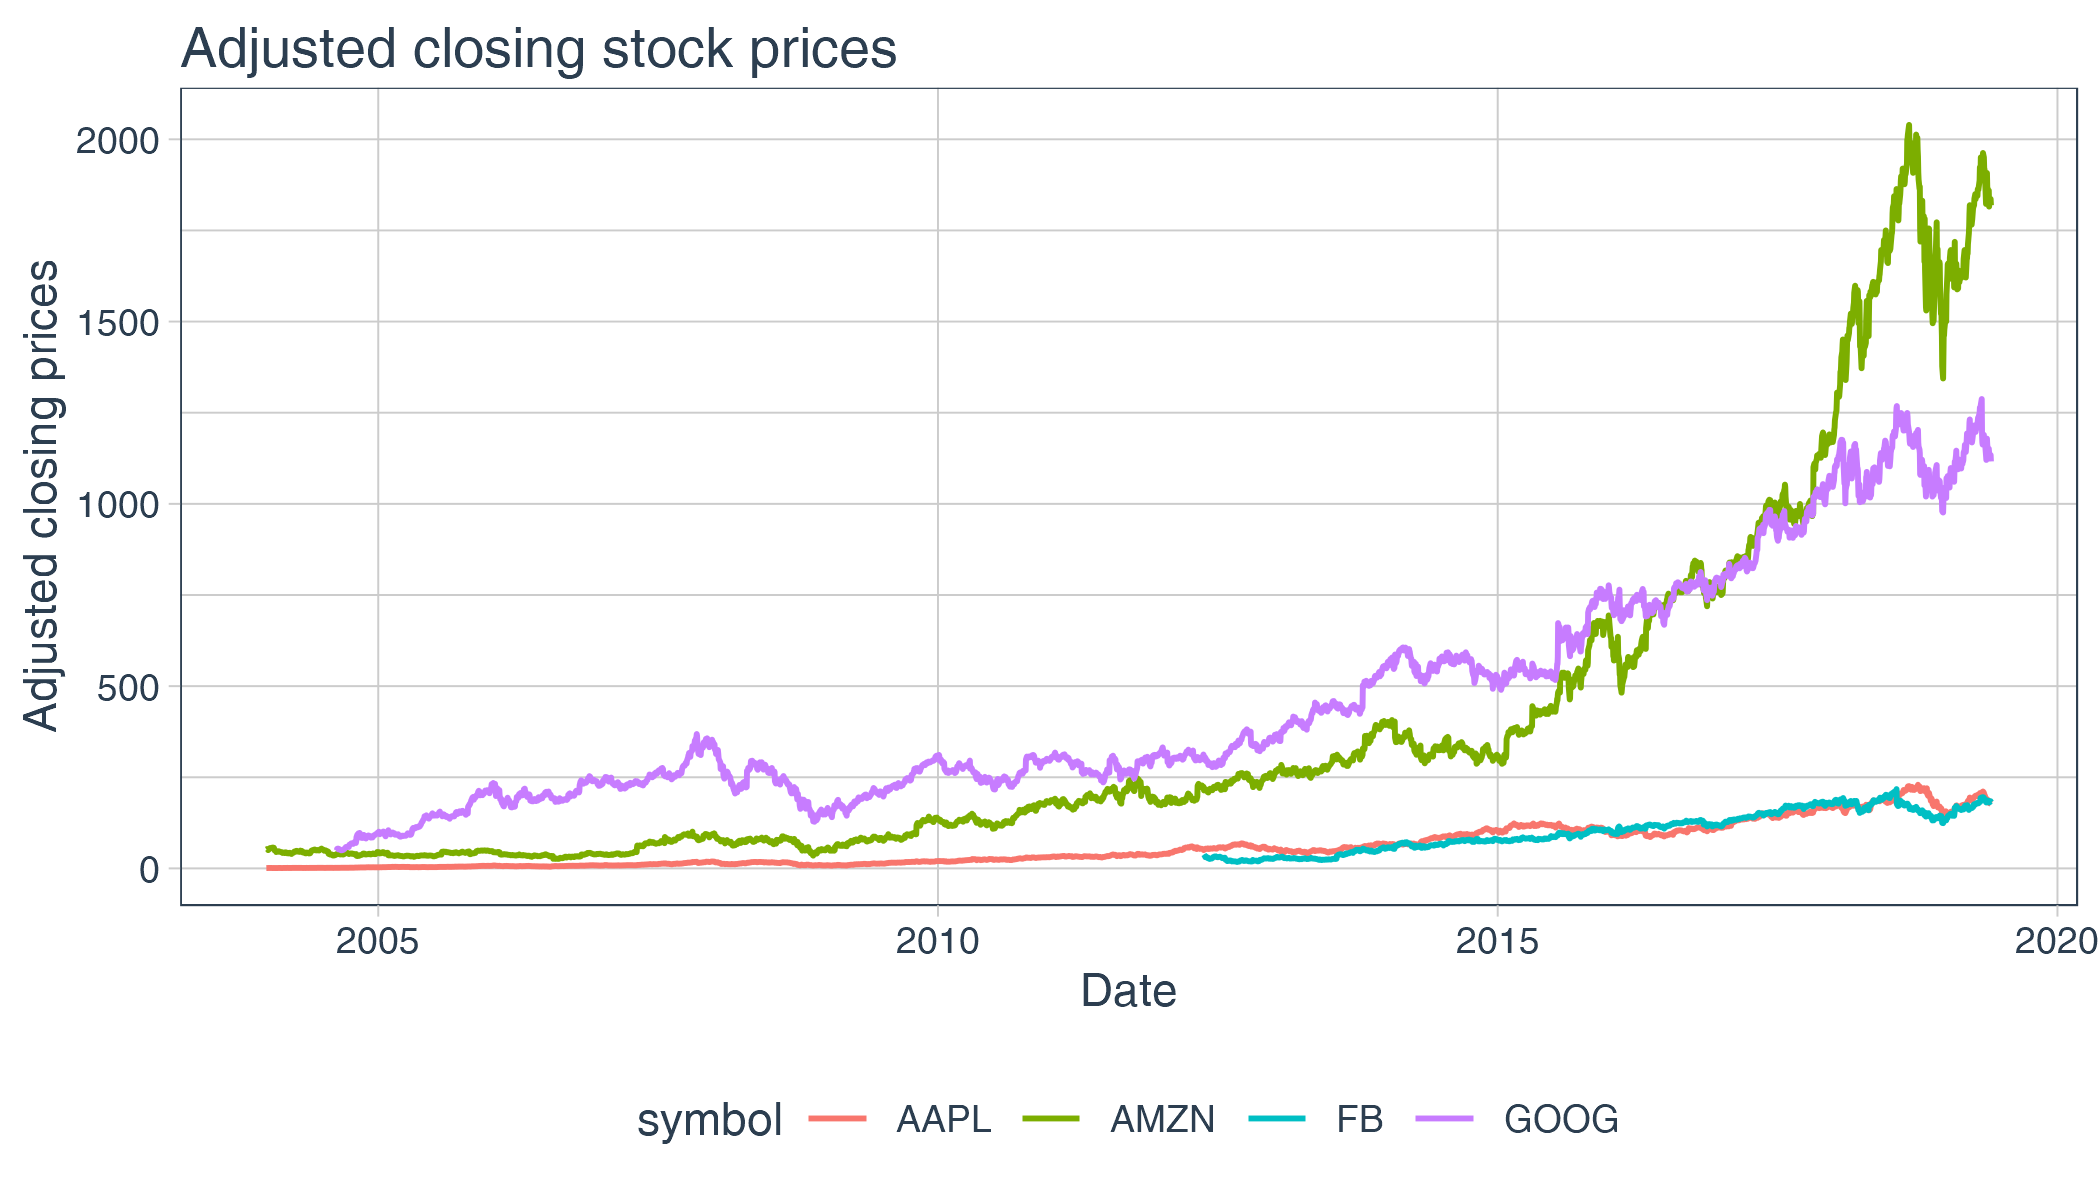

In [34]:
stocks %>% ggplot(aes(x = date, y = adjusted)) +
geom_line(aes(col = symbol)) + 
labs(title = "Adjusted closing stock prices", x = "Date", y = "Adjusted closing prices")

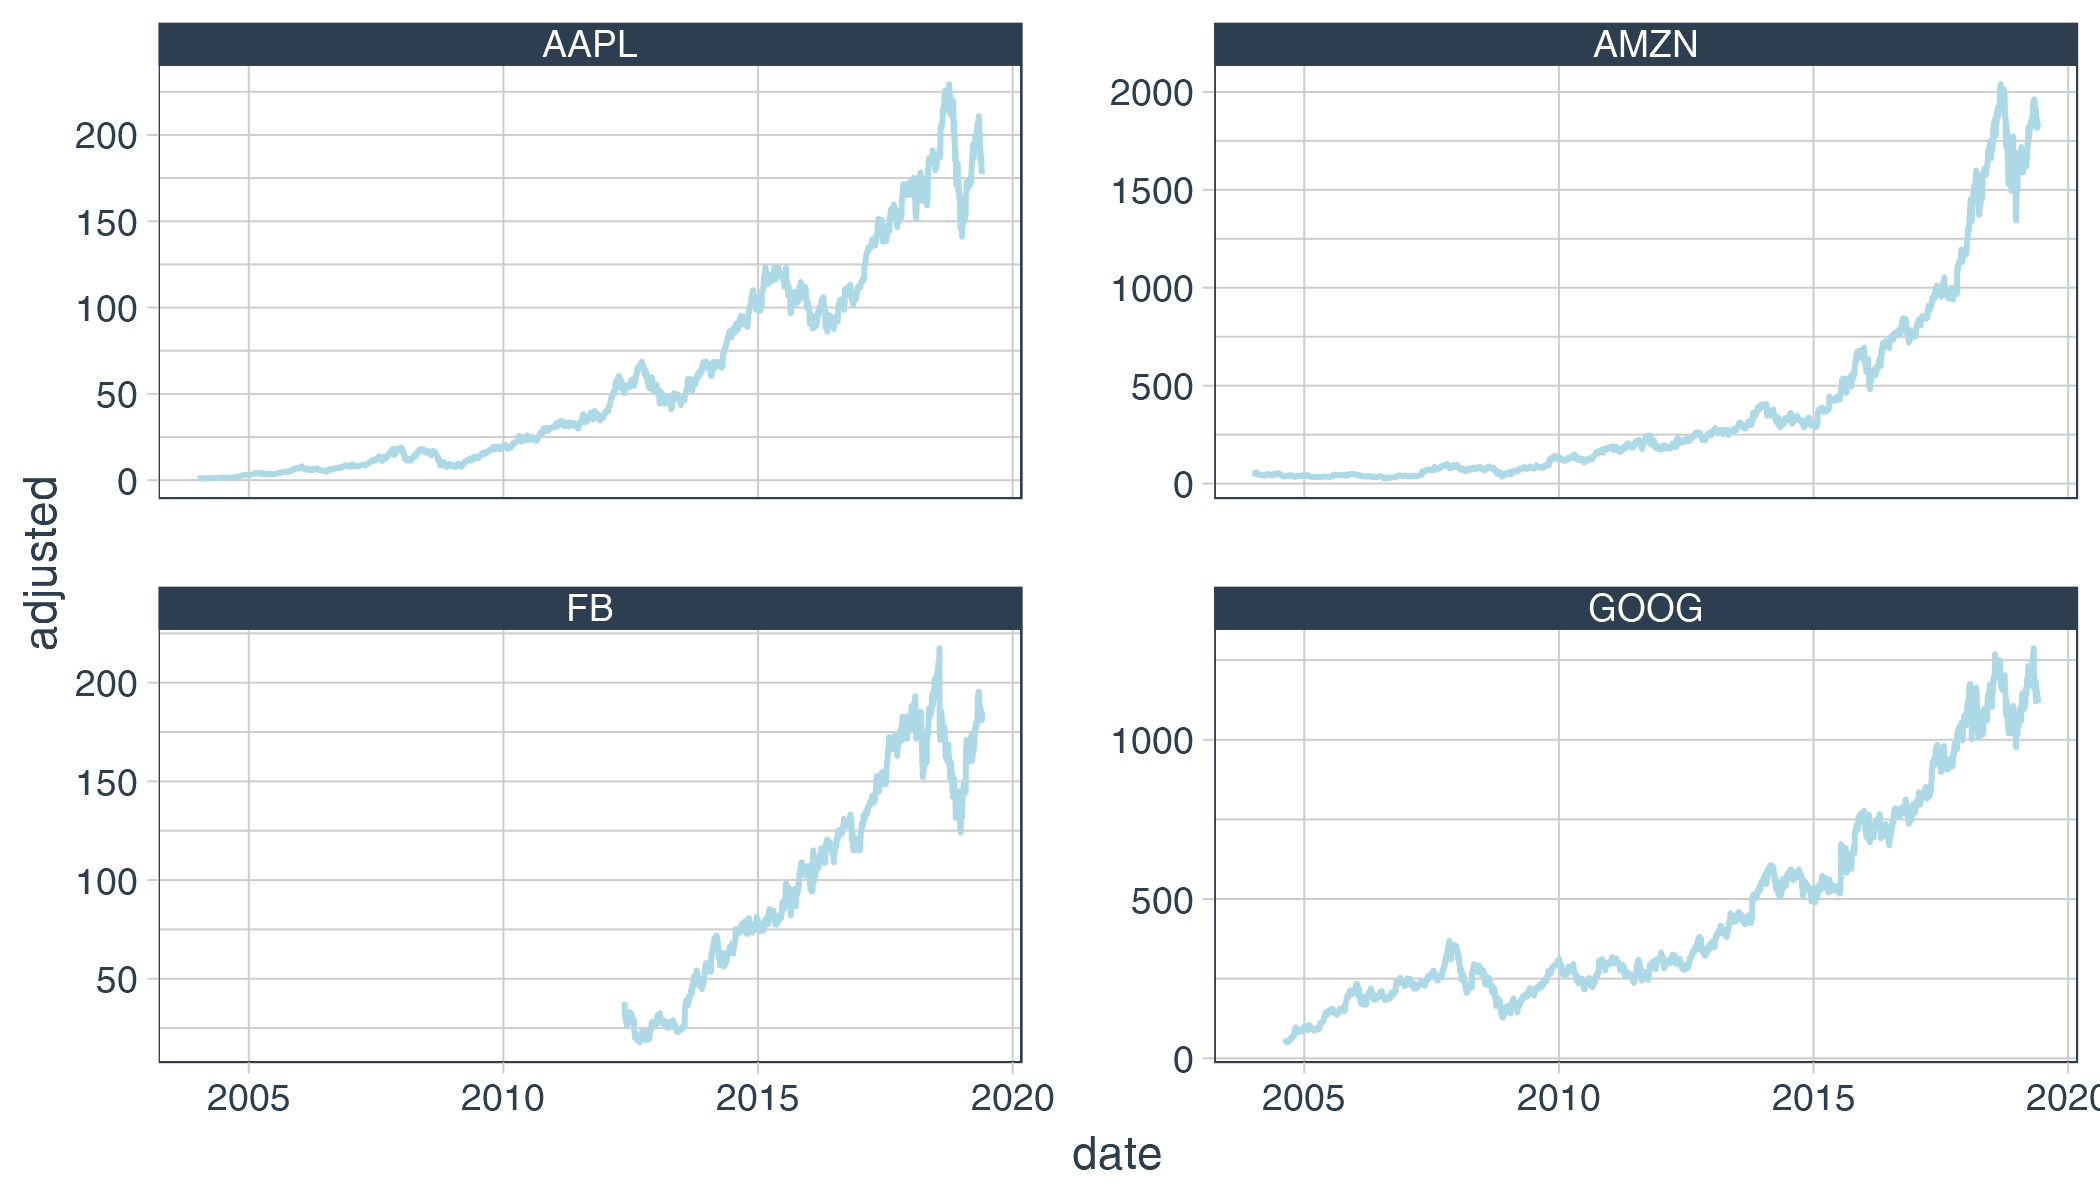

In [31]:
stocks %>% ggplot(aes(x = date, y = adjusted)) +
geom_line(col = "lightblue") + facet_wrap(~symbol, scales = "free_y")

Let's zoom on the last year

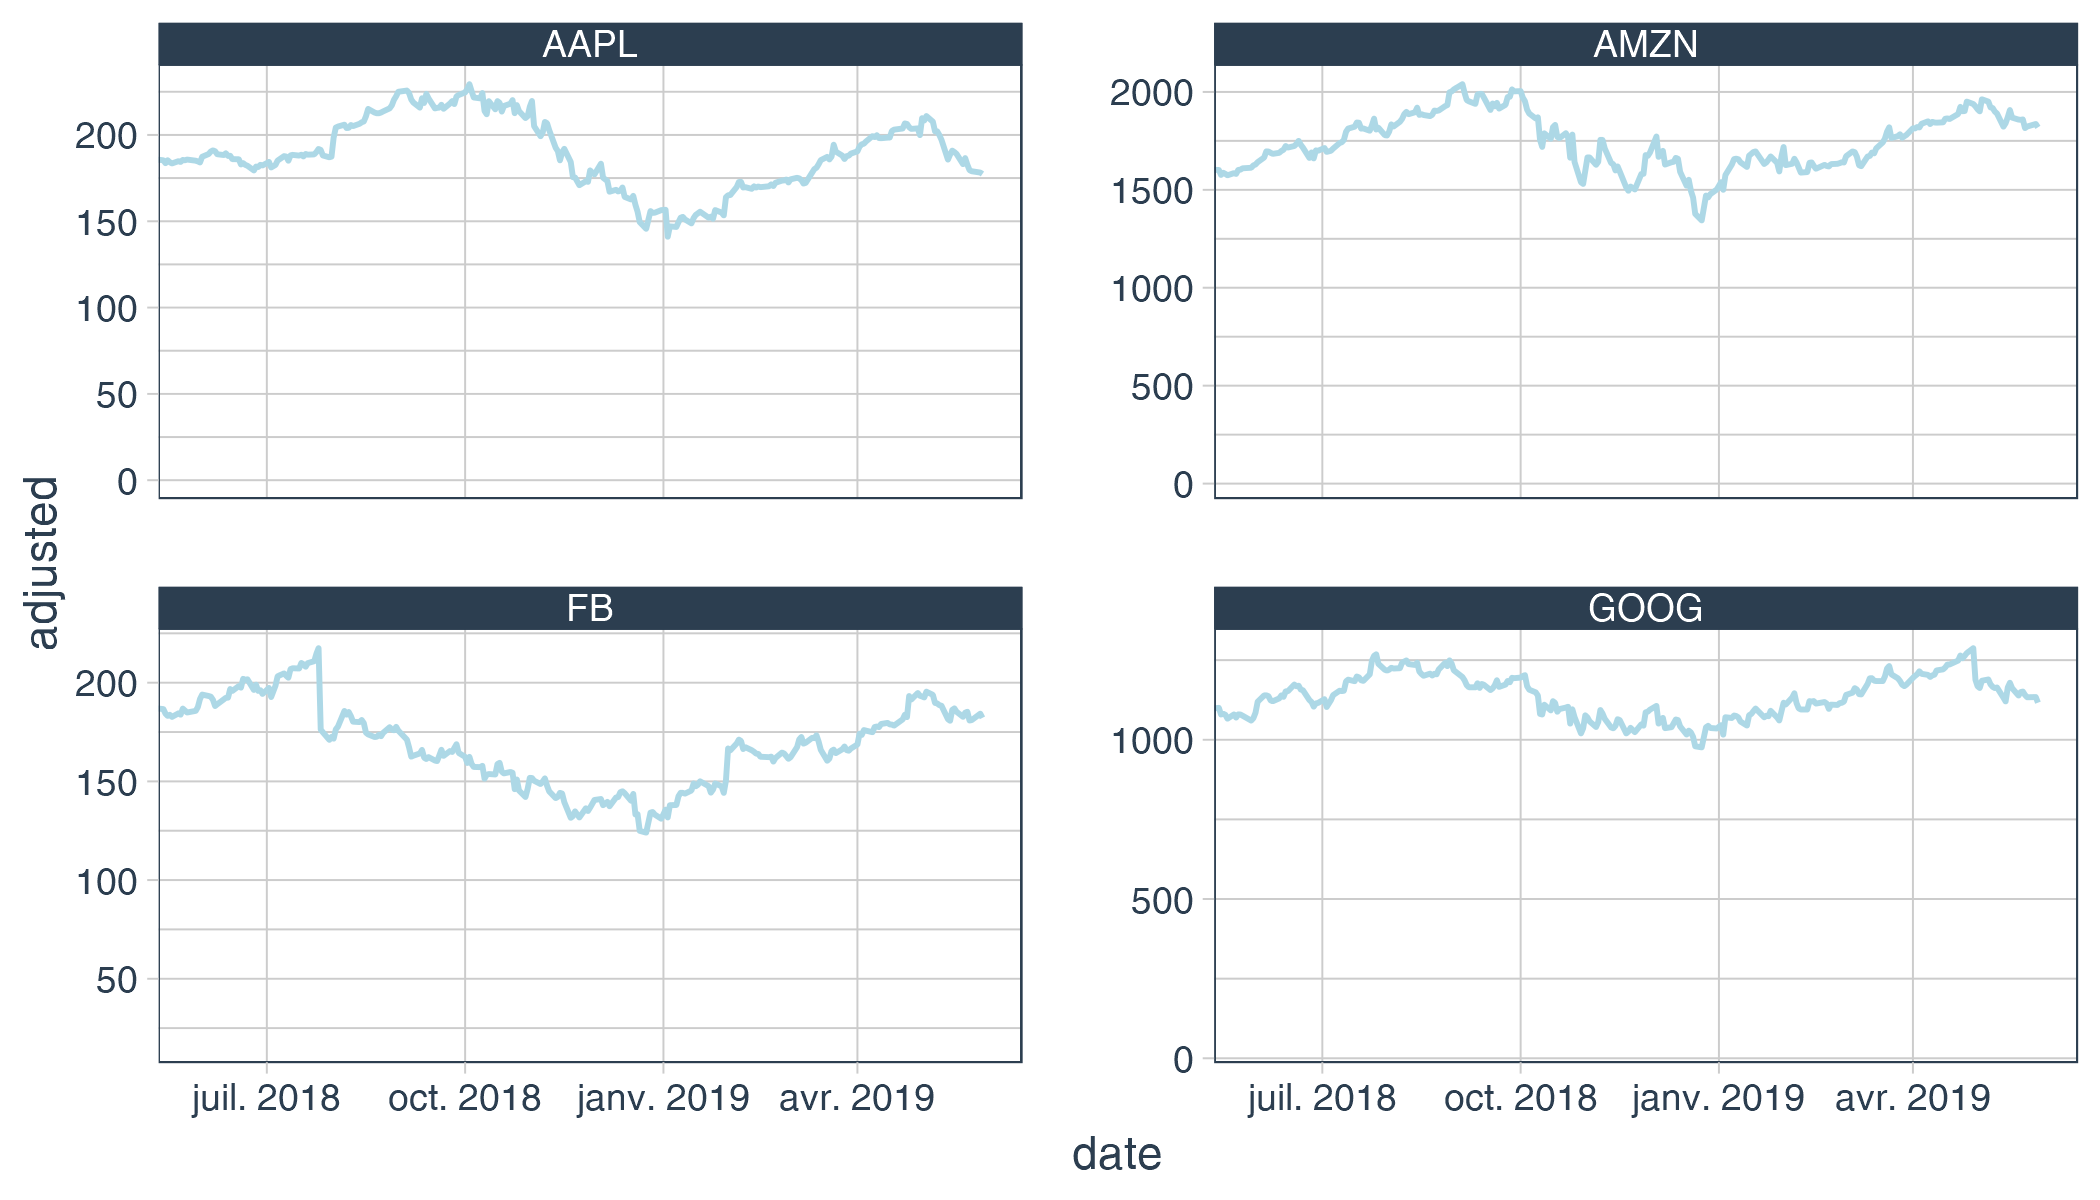

In [36]:
stocks %>% ggplot(aes(x = date, y = adjusted)) +
geom_line(col = "lightblue") + facet_wrap(~symbol, scales = "free_y") +
coord_x_date(xlim = c("2018-05-30", "2019-05-29"))